In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from scipy.optimize import minimize
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
houses = pd.read_excel("merged_house.xlsx")
houses.head()

,address,city,zip_code,latitude,longitude,price,bed_room,bath_room,sqft,neighbourhood,Population,Number of Households,Median Income,Average Income,avg_price_per_neighborhood,house_payment_1yr,house_payment-income ratio
0,"5926 Rod Ave, Woodland Hills, CA 91367",Los Angeles,91367,34.178174,-118.663097,1200000.0,3,2.0,2046.0,Woodland Hills,44931,17953,98803,130769,1.284831e+06,56362.56,0.57
1,"5408 Fallbrook Ave, Woodland Hills, CA 91367",Los Angeles,91367,34.168575,-118.623075,2099990.0,5,6.0,3310.0,Woodland Hills,44931,17953,98803,130769,1.284831e+06,98634.00,1.00
2,"22555 Califa St, Woodland Hills, CA 91367",Los Angeles,91367,34.177511,-118.618729,2499000.0,10,8.0,5242.0,Woodland Hills,44931,17953,98803,130769,1.284831e+06,117375.02,1.19
3,"19750 Gilmore St, Woodland Hills, CA 91367",Los Angeles,91367,34.187349,-118.564145,899900.0,4,2.0,2223.0,Woodland Hills,44931,17953,98803,130769,1.284831e+06,42267.22,0.43
4,"22100 Burbank Blvd #338D, Woodland Hills, CA 9...",Los Angeles,91367,34.171712,-118.609142,395000.0,2,2.0,883.0,Woodland Hills,44931,17953,98803,130769,1.284831e+06,18552.67,0.19


In [5]:
# Check the shape
shape_houses = houses.shape
print("The shape of houses is:", shape_houses)
# Check null values
null_val = houses.isnull().sum()
null_percentage = round(null_val / len(houses),2)
print(null_val)
print(null_percentage)

The shape of houses is: (1230, 17)
address                        0
city                           0
zip_code                       0
latitude                       9
longitude                      9
price                          6
bed_room                      45
bath_room                     76
sqft                          40
neighbourhood                  0
Population                     0
Number of Households           0
Median Income                  0
Average Income                 0
avg_price_per_neighborhood     2
house_payment_1yr              6
house_payment-income ratio     6
dtype: int64
address                       0.00
city                          0.00
zip_code                      0.00
latitude                      0.01
longitude                     0.01
price                         0.00
bed_room                      0.04
bath_room                     0.06
sqft                          0.03
neighbourhood                 0.00
Population                    0.00
Number

Based on the result, the percentage of null values is very small. Also, since the housing price may be related with the number of bedrooms, bathrooms and squred feet a lot. As a result, instead of choosing median values to make up for the null values, we decide to drop columns with null values.

In [6]:
# Drop columns with null price, bed_room, bath_room, sqft and avg_price_per_neighborhood
houses_c = houses.copy()
houses_c = houses.dropna(subset = ["price", "bed_room", "bath_room", "sqft", "avg_price_per_neighborhood"])
houses_c.isnull().sum()

address                       0
city                          0
zip_code                      0
latitude                      9
longitude                     9
price                         0
bed_room                      0
bath_room                     0
sqft                          0
neighbourhood                 0
Population                    0
Number of Households          0
Median Income                 0
Average Income                0
avg_price_per_neighborhood    0
house_payment_1yr             0
house_payment-income ratio    0
dtype: int64

In [7]:
houses_c.head()

,address,city,zip_code,latitude,longitude,price,bed_room,bath_room,sqft,neighbourhood,Population,Number of Households,Median Income,Average Income,avg_price_per_neighborhood,house_payment_1yr,house_payment-income ratio
0,"5926 Rod Ave, Woodland Hills, CA 91367",Los Angeles,91367,34.178174,-118.663097,1200000.0,3,2.0,2046.0,Woodland Hills,44931,17953,98803,130769,1.284831e+06,56362.56,0.57
1,"5408 Fallbrook Ave, Woodland Hills, CA 91367",Los Angeles,91367,34.168575,-118.623075,2099990.0,5,6.0,3310.0,Woodland Hills,44931,17953,98803,130769,1.284831e+06,98634.00,1.00
2,"22555 Califa St, Woodland Hills, CA 91367",Los Angeles,91367,34.177511,-118.618729,2499000.0,10,8.0,5242.0,Woodland Hills,44931,17953,98803,130769,1.284831e+06,117375.02,1.19
3,"19750 Gilmore St, Woodland Hills, CA 91367",Los Angeles,91367,34.187349,-118.564145,899900.0,4,2.0,2223.0,Woodland Hills,44931,17953,98803,130769,1.284831e+06,42267.22,0.43
4,"22100 Burbank Blvd #338D, Woodland Hills, CA 9...",Los Angeles,91367,34.171712,-118.609142,395000.0,2,2.0,883.0,Woodland Hills,44931,17953,98803,130769,1.284831e+06,18552.67,0.19


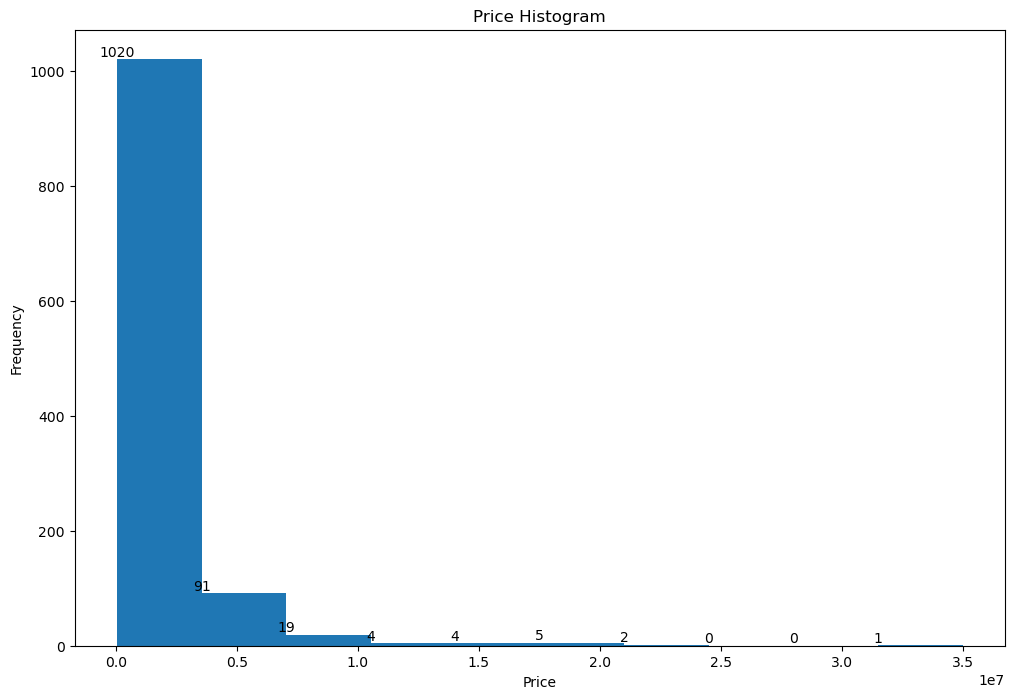

In [8]:
# Drawing histograms to check the distribution of data
plt.figure(figsize = (12,8))
n, bins, patches = plt.hist(houses_c["price"], density=False)

# Add a title and axis labels
plt.title("Price Histogram")
plt.xlabel("Price")
plt.ylabel("Frequency")

# Overlay the count values as text
for i in range(len(patches)):
    plt.text(x=bins[i], y=n[i], s=int(n[i]), ha="center", va="bottom")

# Display the histogram
plt.show()

There seems to be some extremely expensive houses, but the number of extremely expensive houses is small. As a result, let's consider removing these houses.

In [9]:
houses_c = houses_c[houses_c["price"] <= 5000000]
houses_c.shape

(1079, 17)

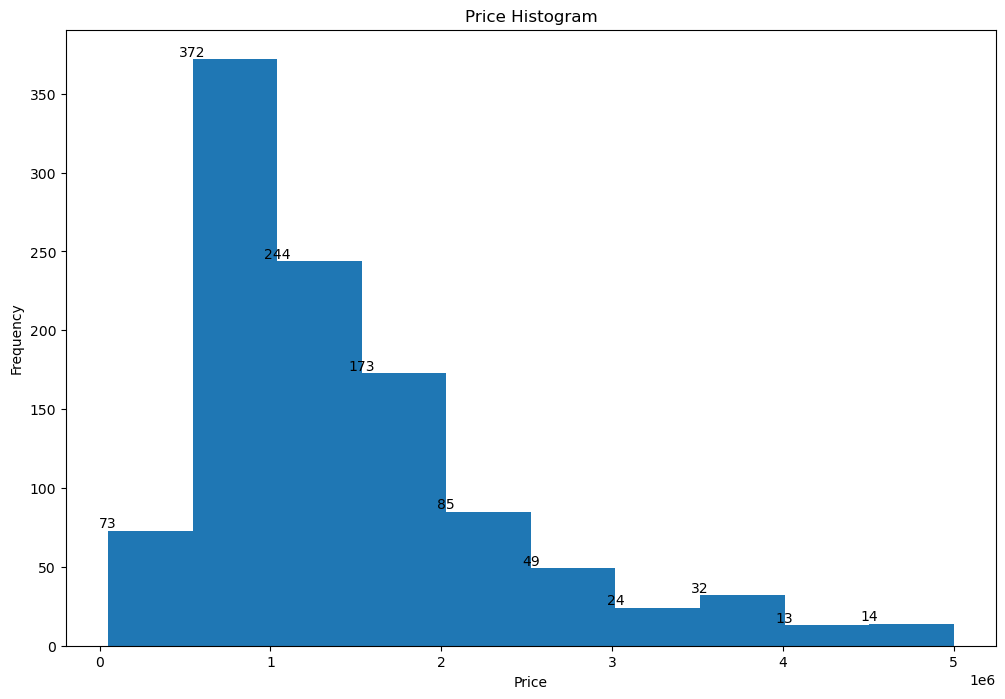

In [10]:
plt.figure(figsize = (12,8))
n, bins, patches = plt.hist(houses_c["price"], density=False)

# Add a title and axis labels
plt.title("Price Histogram")
plt.xlabel("Price")
plt.ylabel("Frequency")

# Overlay the count values as text
for i in range(len(patches)):
    plt.text(x=bins[i], y=n[i], s=int(n[i]), ha="center", va="bottom")

# Display the histogram
plt.show()

Text(0, 0.5, 'Frequency')

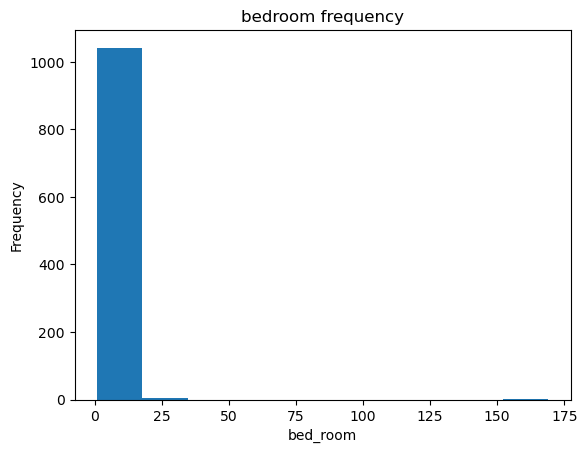

In [11]:
# bed_room
houses_c['bed_room'] = pd.to_numeric(houses_c['bed_room'], errors='coerce')
houses_c = houses_c.dropna(subset=['bed_room'])
plt.hist(houses_c['bed_room'])
plt.title("bedroom frequency")
plt.xlabel("bed_room")
plt.ylabel("Frequency")

In [12]:
houses_c = houses_c[houses_c["bed_room"] <= 10]
houses_c.shape

(1032, 17)

Text(0, 0.5, 'Frequency')

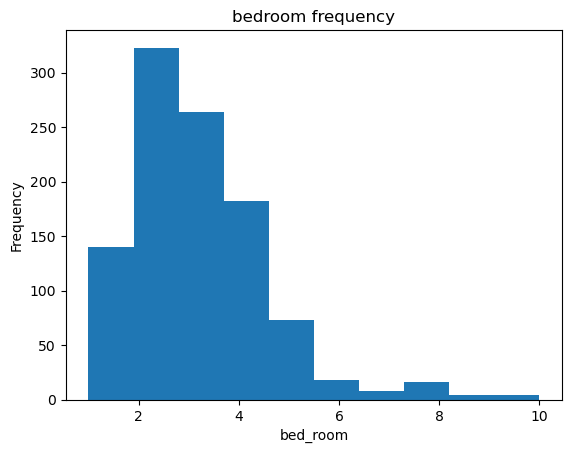

In [13]:
plt.hist(houses_c['bed_room'])
plt.title("bedroom frequency")
plt.xlabel("bed_room")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

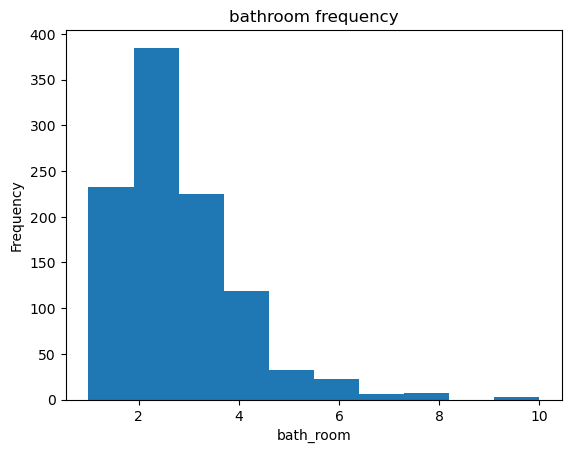

In [14]:
# bath_room
plt.hist(houses_c['bath_room'])
plt.title("bathroom frequency")
plt.xlabel("bath_room")
plt.ylabel("Frequency")

In [15]:
houses_c = houses_c[houses_c["bath_room"] <= 8]
houses_c.shape

(1029, 17)

Text(0, 0.5, 'Frequency')

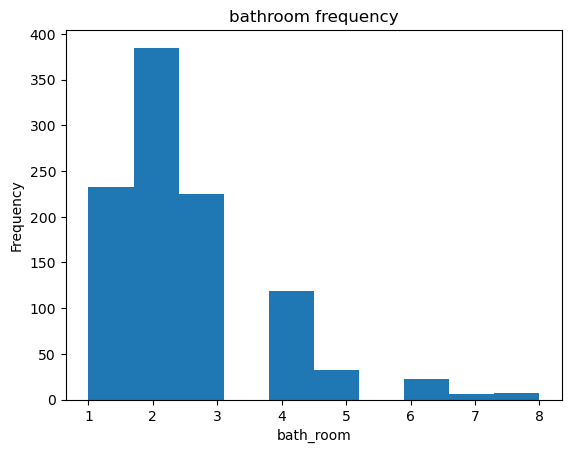

In [16]:
plt.hist(houses_c['bath_room'])
plt.title("bathroom frequency")
plt.xlabel("bath_room")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

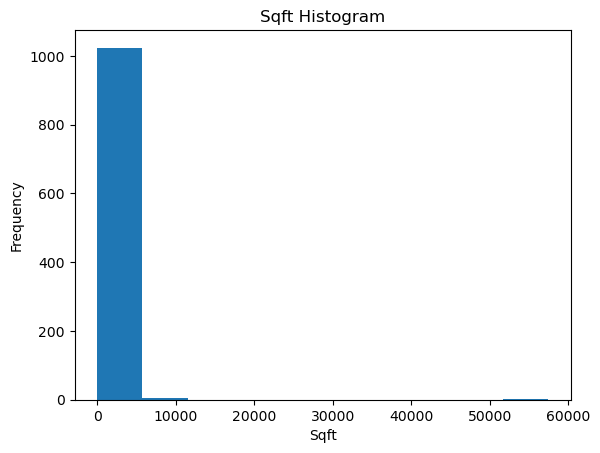

In [17]:
# sqft
plt.hist(houses_c['sqft'])
plt.title("Sqft Histogram")
plt.xlabel("Sqft")
plt.ylabel("Frequency")

In [18]:
houses_c = houses_c[houses_c["sqft"] <= 6000]
houses_c = houses_c[houses_c["sqft"] >= 200]
houses_c.shape

(1025, 17)

Text(0, 0.5, 'Frequency')

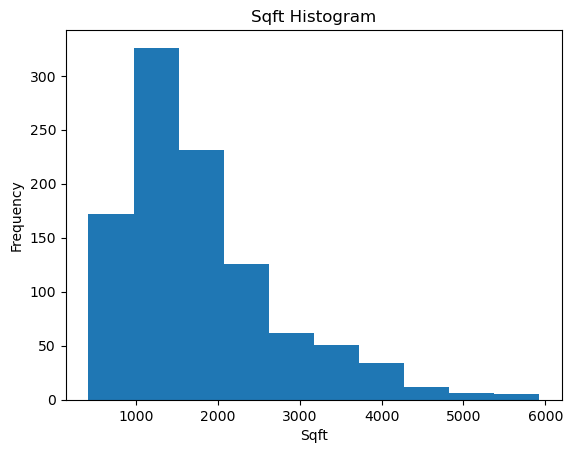

In [19]:
plt.hist(houses_c['sqft'])
plt.title("Sqft Histogram")
plt.xlabel("Sqft")
plt.ylabel("Frequency")

In [20]:
# frequency table of neighbourhood
freq_neighborhood = houses_c["neighbourhood"].value_counts()
print(freq_neighborhood)

Western Addition    243
Sherman Oaks         19
Marina del Rey       19
Greater Wilshire     18
Encino               17
                   ... 
Balboa Terrace        1
Hunters Point         1
Cow Hollow            1
Union Street          1
Mint Hill             1
Name: neighbourhood, Length: 173, dtype: int64


In [21]:
# Delete rows where the frequency of neighbourhood is less than 5
houses_c = houses_c[~houses_c["neighbourhood"].isin(freq_neighborhood[freq_neighborhood < 5].index)]
houses_c.shape

(801, 17)

Text(0, 0.5, 'Frequency')

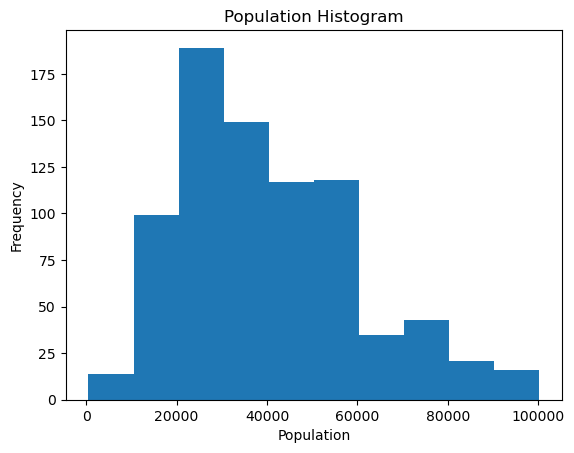

In [22]:
# Population
plt.hist(houses_c['Population'])
plt.title("Population Histogram")
plt.xlabel("Population")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

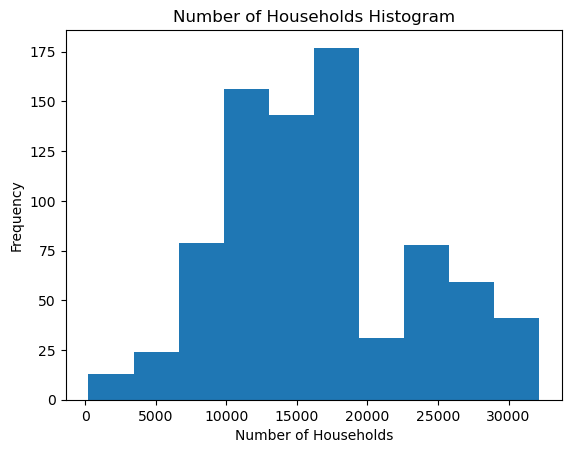

In [23]:
# Number of Households
plt.hist(houses_c['Number of Households'])
plt.title("Number of Households Histogram")
plt.xlabel("Number of Households")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

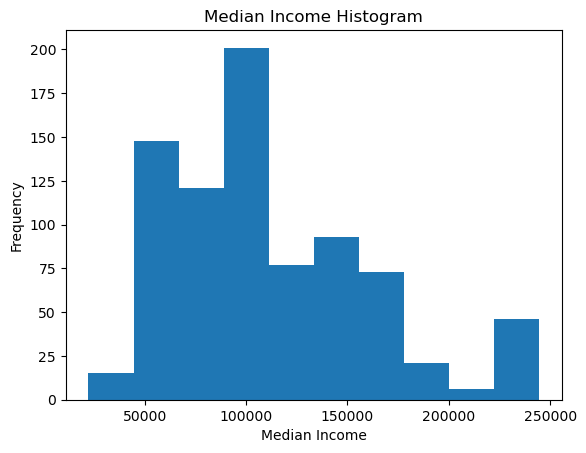

In [24]:
# Median Income
plt.hist(houses_c['Median Income'])
plt.title("Median Income Histogram")
plt.xlabel("Median Income")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

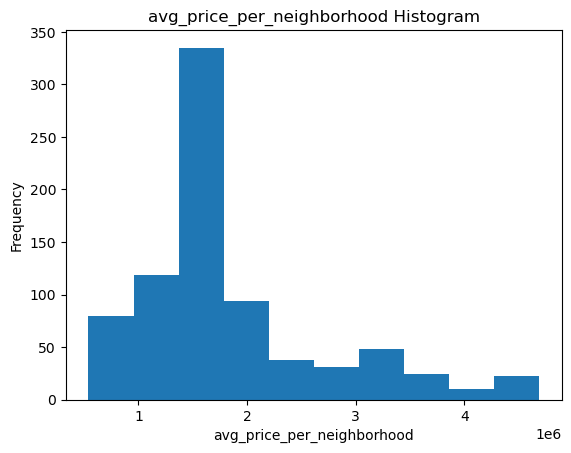

In [25]:
# avg_price_per_neighborhood
plt.hist(houses_c['avg_price_per_neighborhood'])
plt.title("avg_price_per_neighborhood Histogram")
plt.xlabel("avg_price_per_neighborhood")
plt.ylabel("Frequency")

In [26]:
houses_c.head()

,address,city,zip_code,latitude,longitude,price,bed_room,bath_room,sqft,neighbourhood,Population,Number of Households,Median Income,Average Income,avg_price_per_neighborhood,house_payment_1yr,house_payment-income ratio
0,"5926 Rod Ave, Woodland Hills, CA 91367",Los Angeles,91367,34.178174,-118.663097,1200000.0,3.0,2.0,2046.0,Woodland Hills,44931,17953,98803,130769,1.284831e+06,56362.56,0.57
1,"5408 Fallbrook Ave, Woodland Hills, CA 91367",Los Angeles,91367,34.168575,-118.623075,2099990.0,5.0,6.0,3310.0,Woodland Hills,44931,17953,98803,130769,1.284831e+06,98634.00,1.00
2,"22555 Califa St, Woodland Hills, CA 91367",Los Angeles,91367,34.177511,-118.618729,2499000.0,10.0,8.0,5242.0,Woodland Hills,44931,17953,98803,130769,1.284831e+06,117375.02,1.19
3,"19750 Gilmore St, Woodland Hills, CA 91367",Los Angeles,91367,34.187349,-118.564145,899900.0,4.0,2.0,2223.0,Woodland Hills,44931,17953,98803,130769,1.284831e+06,42267.22,0.43
4,"22100 Burbank Blvd #338D, Woodland Hills, CA 9...",Los Angeles,91367,34.171712,-118.609142,395000.0,2.0,2.0,883.0,Woodland Hills,44931,17953,98803,130769,1.284831e+06,18552.67,0.19


Now we've finished the data cleaning. Let's start to do machine learning!

In [27]:
# Linear Regression
# create dummy variables
neighborhood_dummy = pd.get_dummies(houses_c["neighbourhood"], prefix = "neighborhood")
city_dummy = pd.get_dummies(houses_c["city"], prefix = "city")
houses_c = pd.concat([houses_c, neighborhood_dummy], axis=1)
houses_c = pd.concat([houses_c, city_dummy], axis = 1)
houses_c = houses_c.drop(["address", "city", "zip_code", "latitude", "longitude", "neighbourhood", "Average Income", "house_payment_1yr", "house_payment-income ratio"], axis = 1)

In [28]:
X = houses_c.drop(["price", "neighborhood_Western Addition", "city_Los Angeles"], axis=1)
y = houses_c["price"]
# Add a constant to the independent variables
X = sm.add_constant(X)
# Fit the model
model = sm.OLS(y, X).fit()
# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     19.11
Date:                Tue, 21 Mar 2023   Prob (F-statistic):          3.08e-126
Time:                        00:11:36   Log-Likelihood:                -11719.
No. Observations:                 801   AIC:                         2.359e+04
Df Residuals:                     726   BIC:                         2.394e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

The smallest eigenvalue is 6.43e-28. This might indicate that there are strong multicollinearity problems or that the design matrix is singular. The Durbin-Watson test result is 2.012, which means there is no autoregressive problem.

In [29]:
# Let's check whether it has heteroscedasticity and multicolinearity problem
# Heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
_, pvalue, _, _ = het_breuschpagan(model.resid, X)
print("Breusch-Pagan test p-value:", pvalue)

Breusch-Pagan test p-value: 4.978979063929385e-07


The p-value is extremely small, which indicates very strong heteroscedasticity problem.

In [30]:
# Multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create a list of column names for the predictor variables
predictor_cols = ['bed_room', 'bath_room', 'sqft', 'Population', 'Number of Households', 'Median Income', 'avg_price_per_neighborhood']
X_predictors = X[predictor_cols]

# calculate the VIF for each predictor variable
vif = [variance_inflation_factor(X_predictors.values, i) for i in range(X_predictors.shape[1])]

# create a DataFrame to display the results
vif_df = pd.DataFrame({'Variable': predictor_cols, 'VIF': vif})
print(vif_df)

                     Variable        VIF
0                    bed_room  15.049179
1                   bath_room  13.529606
2                        sqft  14.876602
3                  Population  19.771820
4        Number of Households  23.478595
5               Median Income   3.851598
6  avg_price_per_neighborhood   5.789942


Almost all the VIF tests are over 5. As a result, this model also exists strong multicolinearity problem.

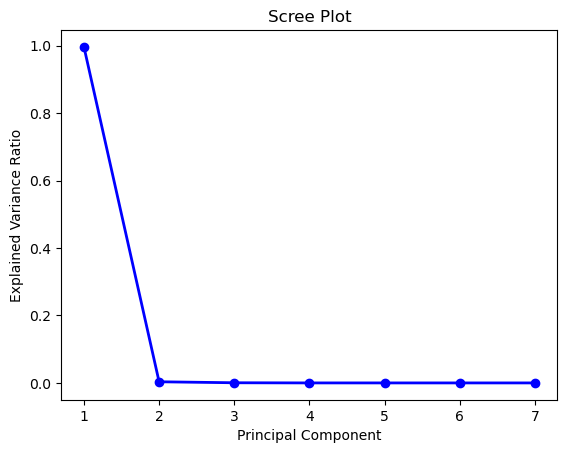

In [31]:
# To solve these problems, I first try PCA to solve the multicolinearity problem.
from sklearn.decomposition import PCA

# select columns to use in PCA
cols_for_pca = ['bed_room', 'bath_room', 'sqft', 'Population', 'Number of Households', 'Median Income', 'avg_price_per_neighborhood']

# perform PCA on X variables
houses_c = houses_c.reset_index(drop=True)
pca = PCA()
X_pca = pca.fit_transform(houses_c[cols_for_pca])

# calculate the explained variance ratio for each principal component
explained_var = pca.explained_variance_ratio_

# plot the scree plot
plt.plot(range(1, len(explained_var) + 1), explained_var, 'bo-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

It seems only the first principal component is enough.

In [32]:
# create a DataFrame of the principal components
pc_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
# Select the first PC
X_pca_1 = pc_df['PC1']
# concatenate the first principal component with the dummy variables
neighborhood_dummy = neighborhood_dummy.reset_index(drop=True)
city_dummy = city_dummy.reset_index(drop=True)
X_transformed = pd.concat([X_pca_1, neighborhood_dummy, city_dummy], axis=1)
X_transformed.head()

,PC1,neighborhood_Arlington Heights,neighborhood_Bayview,neighborhood_Bernal Heights,neighborhood_Beverly Crest,neighborhood_Beverly Grove,neighborhood_Brentwood,neighborhood_Canoga Park,neighborhood_Chatsworth,neighborhood_Downtown Los Angeles,...,neighborhood_West Hollywood,neighborhood_Westchester,neighborhood_Western Addition,neighborhood_Western South of Market,neighborhood_Westlake,neighborhood_Westmont,neighborhood_Winnetka,neighborhood_Woodland Hills,city_Los Angeles,city_San_Francisco
0,-588069.279965,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,-588068.962267,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,-588068.476672,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,-588069.235477,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,-588069.572276,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [33]:
X_new = X_transformed.drop(["neighborhood_Western Addition", "city_Los Angeles"], axis=1)
y = houses_c["price"]

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=9964)

# create and fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predict on test set and calculate RMSE
y_pred = model.predict(X_test)
r2 = model.score(X_test, y_test)
r2_in = model.score(X_train, y_train)
print(f"IS R-squared: {r2_in:.2f}")
print(f"OOS R-squared: {r2:.2f}")

IS R-squared: 0.32
OOS R-squared: -0.02


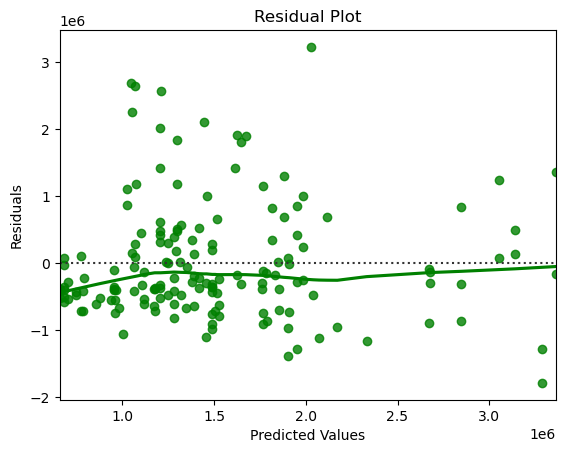

In [34]:
# Check Heteroscedasticity
# calculate residuals
residuals = y_test - y_pred

# plot residuals against predicted values
sns.residplot(x=y_pred, y=residuals, lowess=True, color="g")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

Based on the residual plot, there seems to be no serious heteroscedasticity problem since the points are scattered almost randomly around the horizontal line at zero.

Based on the result of PCA-based linear regression model, the accuracy seems to be terrible especially when it comes to out-of-sample dataset. Then let's try regression tree models.

In [35]:
# Let's try CV LASSO regression!
# Split the data into train and test sets
X = X[predictor_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9964)

# Fit LASSO regression with cross-validation
lasso_cv = LassoCV(cv=10, random_state=9964)
lasso_cv.fit(X_train, y_train)
print("Coefficients:", lasso_cv.coef_)

# Evaluate the model on the test set
y_pred_la = lasso_cv.predict(X_test)
test_score = lasso_cv.score(X_test, y_test)
mse_la = mean_squared_error(y_test, y_pred_la)
msle_la = mean_squared_log_error(y_test, y_pred_la)
rmsle_la = np.sqrt(msle_la)
print("RMSLE:", rmsle_la)
print("Test MSE score: {:.4f}".format(mse_la))
print("Test R^2 score: {:.4f}".format(test_score))

Coefficients: [  0.           0.         257.27154958  -3.37298559   0.
   3.15739398   0.32342811]
RMSLE: 0.4578837881190224
Test MSE score: 512355873004.7930
Test R^2 score: 0.3871


Even though the accuracy is still not very high, it is much better than the original one.

In [36]:
# Let's first try the full tree model
# Decision tree model
X = houses_c.drop(["price"], axis=1)
y = houses_c["price"]
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9964)
# Fit the tree model
tree_model = DecisionTreeRegressor(random_state=9964)
tree_model.fit(X_train, y_train)
# R-squared & MSE
y_pred = tree_model.predict(X_test)
y_train_pred = tree_model.predict(X_train)
accuracy = r2_score(y_test, y_pred)
accuracy_train = r2_score(y_train_pred, y_train)
mse_train_1 = mean_squared_error(y_train, y_train_pred)
mse_test_1 = mean_squared_error(y_test, y_pred) 
msle_train_1 = mean_squared_log_error(y_train, y_train_pred)
rmsle_train_1 = np.sqrt(msle_train_1)
msle_test_1 = mean_squared_log_error(y_test, y_pred)
rmsle_test_1 = np.sqrt(msle_test_1)
print("In-sample RMSLE:", rmsle_train_1)
print("In-sample MSE score: {:.4f}".format(mse_train_1))
print("Out-of-sample RMSLE:", rmsle_test_1)
print("Out-of-sample MSE score: {:.4f}".format(mse_test_1))
print("Accuracy of the decision tree model for in-sample dataset:", accuracy_train)
print("Accuracy of the decision tree model for out-of-sample dataset:", accuracy)

In-sample RMSLE: 0.005682973797769008
In-sample MSE score: 34082031.2500
Out-of-sample RMSLE: 0.3787183769534392
Out-of-sample MSE score: 491214279421.4783
Accuracy of the decision tree model for in-sample dataset: 0.9999618139293179
Accuracy of the decision tree model for out-of-sample dataset: 0.41239332968213704


In [37]:
# Cross validation
# Fit the tree model with k-fold cross-validation
tree_model_c = DecisionTreeRegressor(random_state=9964)
cv_scores_1 = cross_val_score(tree_model_c, X_train, y_train, cv=5)
tree_model_c.fit(X_train, y_train)
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores_1)
print("Mean cross-validation score:", np.mean(cv_scores_1))

# OOS R-squared
y_pred_c = tree_model_c.predict(X_test)
accuracy_c = r2_score(y_test, y_pred_c)
print("Accuracy of the decision tree model for out-of-sample dataset:", accuracy_c)

Cross-validation scores: [0.47065089 0.33898215 0.48803885 0.19086994 0.39025097]
Mean cross-validation score: 0.37575855969116334
Accuracy of the decision tree model for out-of-sample dataset: 0.41239332968213704


The R-squared of in-sample dataset is much larger than OOS R-squared. As a result, there may be severe overfitting problem.

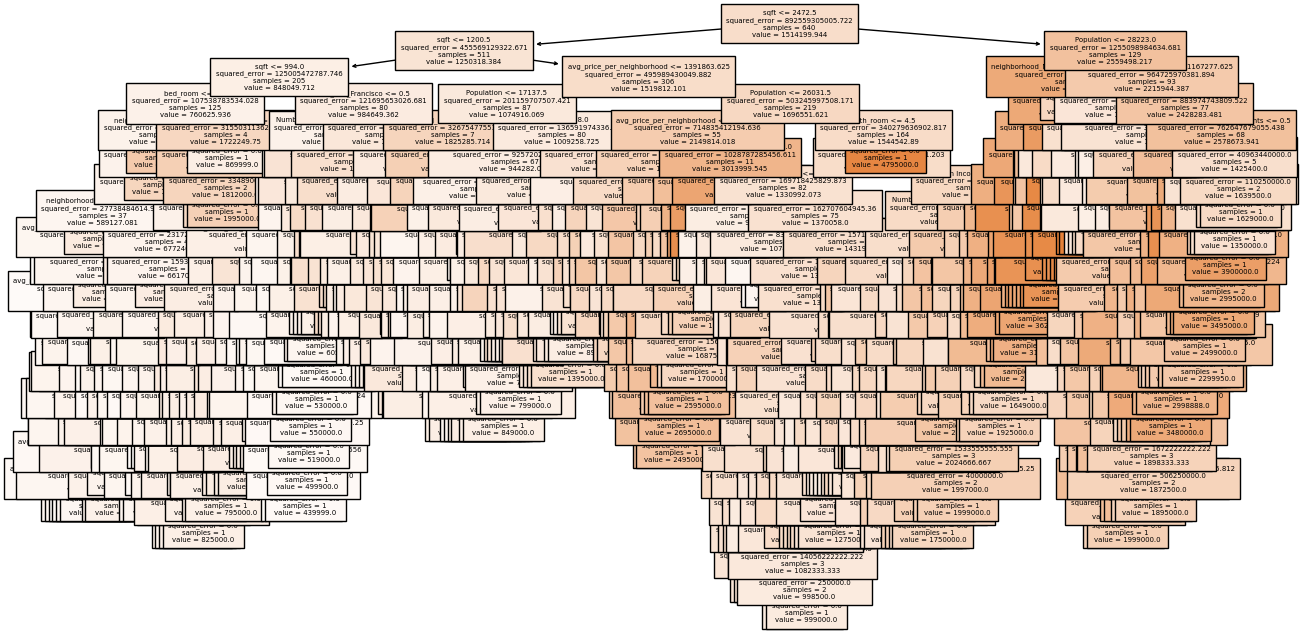

In [39]:
# Plot decision tree
plt.figure(figsize=(15,8))
plot_tree(tree_model, feature_names=X_train.columns, filled=True, fontsize=5)
plt.show()

The tree plot is too complex to interpret, which is also an indicator of overfitting.

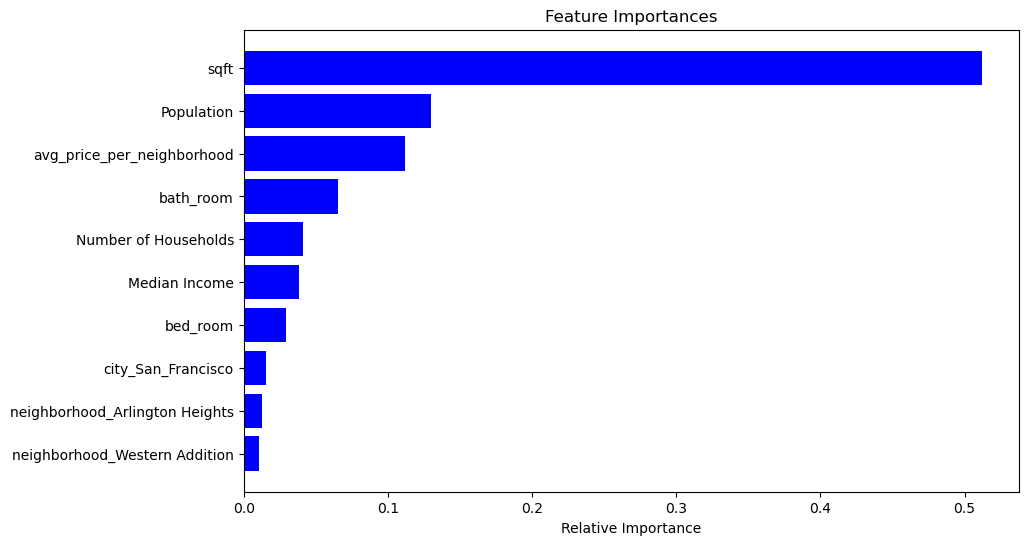

In [38]:
# Plot scree plot
importances = tree_model.feature_importances_
indices = np.argsort(importances)[-10:]  # select the top 10 important features

plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Based on the importance plot, the sqft of the house and the population, avg_price_per_neighborhood seems to be the most important features that influence the housing price.

In [40]:
# Fit the tree model with k-fold cross-validation
tree_model_c_2 = DecisionTreeRegressor(random_state=9964, min_samples_leaf=20)
cv_scores_2 = cross_val_score(tree_model_c_2, X_train, y_train, cv=5)
tree_model_c_2.fit(X_train, y_train)
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores_2)
print("Mean cross-validation score:", np.mean(cv_scores_2))

# OOS R-squared
y_pred_c_2 = tree_model_c_2.predict(X_test)
accuracy_c_2 = r2_score(y_test, y_pred_c_2)
mse_test_2 = mean_squared_error(y_test, y_pred_c_2) 
msle_test_2 = mean_squared_log_error(y_test, y_pred_c_2)
rmsle_test_2 = np.sqrt(msle_test_2)
print("OOS RMSLE:", rmsle_test_2)
print("OOS MSE score: {:.4f}".format(mse_test_2))
print("Accuracy of the decision tree model for out-of-sample dataset:", accuracy_c_2)

Cross-validation scores: [0.54390704 0.38551425 0.58901353 0.55724037 0.47983174]
Mean cross-validation score: 0.511101385629747
OOS RMSLE: 0.3683116515400347
OOS MSE score: 356669624123.9861
Accuracy of the decision tree model for out-of-sample dataset: 0.5733400696701014


The OOS R-squared and MSE improved a lot.

In [41]:
# Also restrict the max depth
tree_model_c_3 = DecisionTreeRegressor(random_state=9964, min_samples_leaf = 20, max_depth = 10)
cv_scores_3 = cross_val_score(tree_model_c_3, X_train, y_train, cv=5)
tree_model_c_3.fit(X_train, y_train)
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores_3)
print("Mean cross-validation score:", np.mean(cv_scores_3))

# OOS R-squared
y_pred_c_3 = tree_model_c_3.predict(X_test)
accuracy_c_3 = r2_score(y_test, y_pred_c_3)
mse_test_3 = mean_squared_error(y_test, y_pred_c_3) 
msle_test_3 = mean_squared_log_error(y_test, y_pred_c_3)
rmsle_test_3 = np.sqrt(msle_test_3)
print("OOS RMSLE:", rmsle_test_3)
print("OOS MSE score: {:.4f}".format(mse_test_3))
print("Accuracy of the decision tree model for out-of-sample dataset:", accuracy_c_3)

Cross-validation scores: [0.54390704 0.38551425 0.58901353 0.55724037 0.47983174]
Mean cross-validation score: 0.511101385629747
OOS RMSLE: 0.3683116515400347
OOS MSE score: 356669624123.9861
Accuracy of the decision tree model for out-of-sample dataset: 0.5733400696701014


The R-squared and MSE did not change.

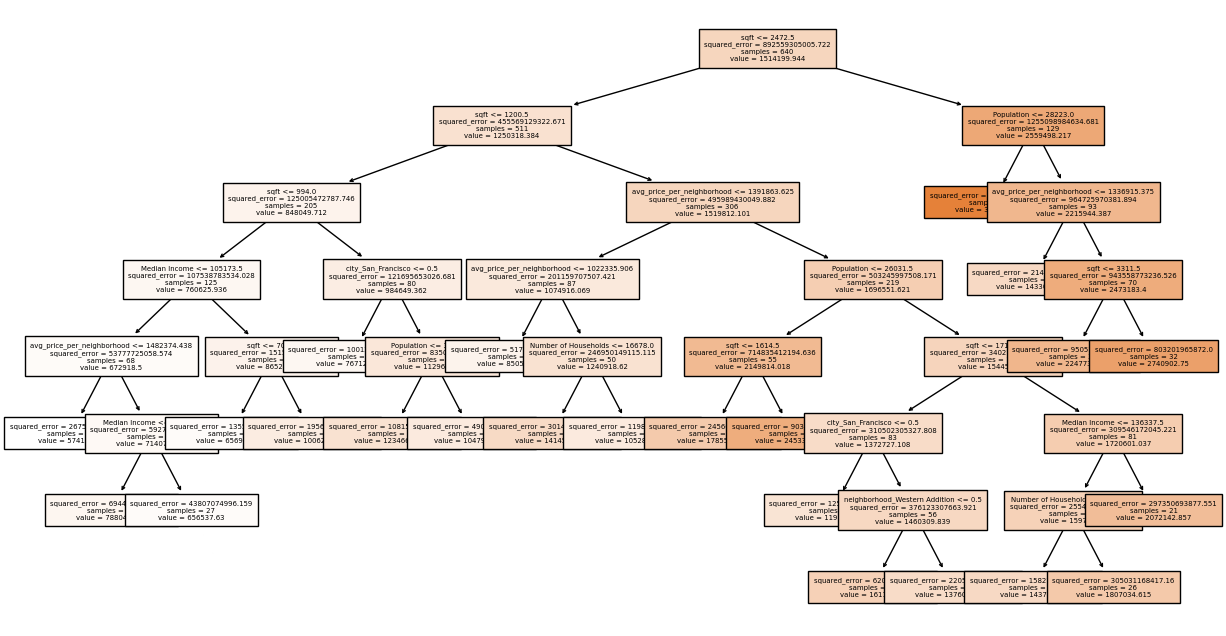

In [42]:
# Draw the updated tree plot
plt.figure(figsize=(15,8))
plot_tree(tree_model_c_3, feature_names=X_train.columns, filled=True, fontsize=5)
plt.show()

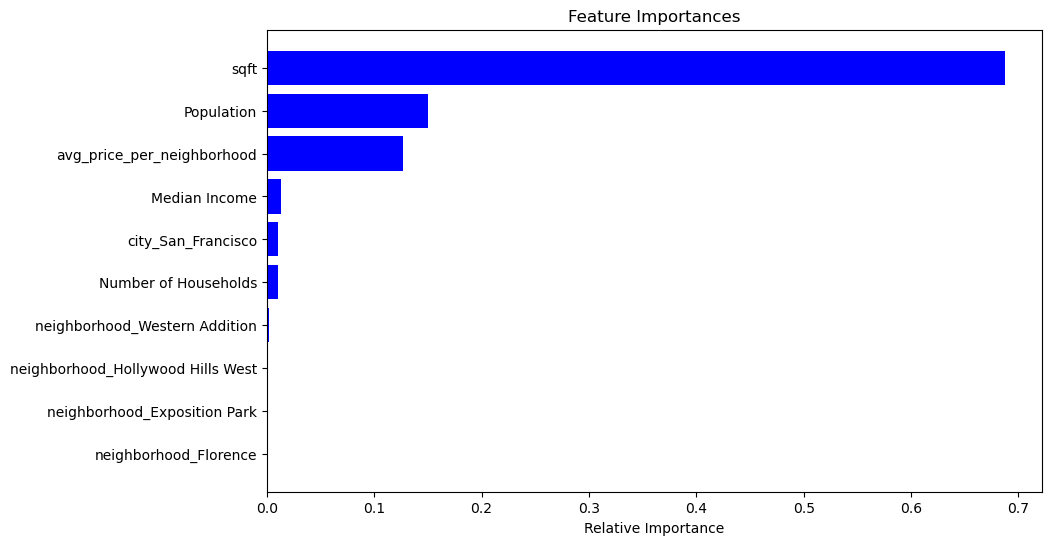

In [43]:
# Plot scree plot
importances = tree_model_c_3.feature_importances_
indices = np.argsort(importances)[-10:]  # select the top 10 important features

plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Still, sqft, population and avg_price_per_neighborhood are the most important features determining the housing price.

To achieve better results, let's now try to use random forest to tackle this prediction.

In [44]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=500, random_state=9964)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=9964)

In [45]:
# Calculate R-squared score on test set
y_pred_rf = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_rf) 
msle_test_rf = mean_squared_log_error(y_test, y_pred_rf)
rmsle_test_rf = np.sqrt(msle_test_rf)
print("OOS RMSLE:", rmsle_test_rf)
print("OOS MSE score: {:.4f}".format(mse_test_rf))
print("R-squared score:", r2)

OOS RMSLE: 0.3137132999154266
OOS MSE score: 283382267840.0465
R-squared score: 0.6610088146689703


The OOS R-squared is increased to 0.654 from 0.573. The OOS MSE is decreased from 356669624123.9861 to 283382267840.0465.

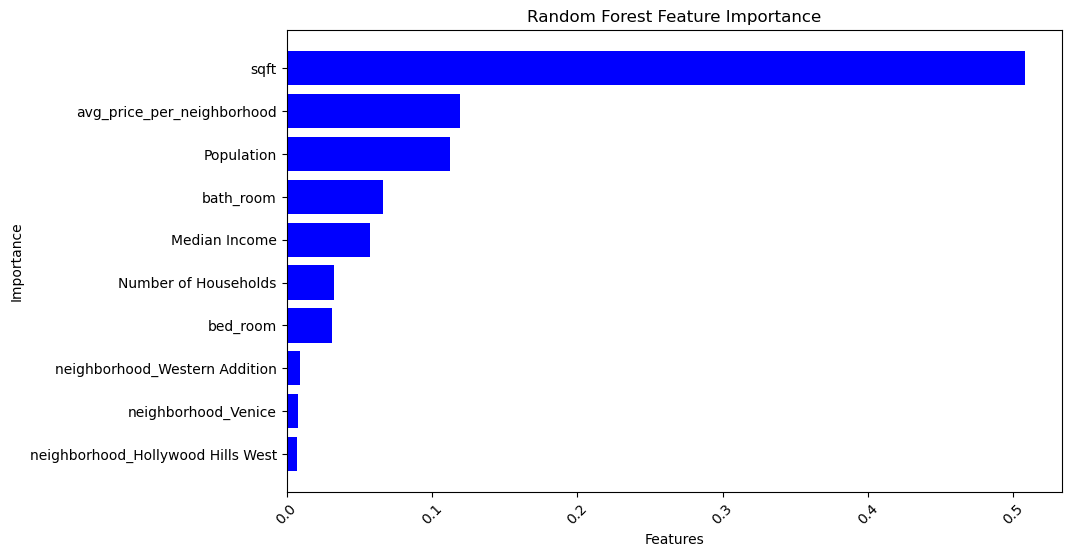

In [46]:
# Plot feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]
plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

Similarly, sqft, population, avg_price_per_neighborhood are the most important features.

In [47]:
# Create XGBoost model with default hyperparameters
xgb_model = XGBRegressor()

# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))
xgb_model.fit(X_train, y_train)

Cross-validation scores: [0.69338098 0.47496979 0.56564205 0.61550875 0.60643591]
Mean cross-validation score: 0.5911874974242749


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [48]:
# Compute R-squared score on the test set
y_pred_xg = xgb_model.predict(X_test)
accuracy = r2_score(y_test, y_pred_xg)
mse_test_xg = mean_squared_error(y_test, y_pred_xg)
msle_test_xg = mean_squared_log_error(y_test, y_pred_xg)
rmsle_test_xg = np.sqrt(msle_test_xg)
print("OOS RMSLE:", rmsle_test_xg)
print("OOS MSE score: {:.4f}".format(mse_test_xg))
print("Accuracy of the XGBoost model on the test set:", accuracy)

OOS RMSLE: 0.3162697662173646
OOS MSE score: 364199738672.8027
Accuracy of the XGBoost model on the test set: 0.5643322990850252


In [49]:
# Ensemble Random forest, XGBoost and Decision tree model based on the accuracy
# ensemble_preds = (y_pred_xg * accuracy + y_pred_rf * r2 + y_pred_c_3 * accuracy_c_3 + y_pred_la * test_score)/(accuracy + r2 + accuracy_c_3 + test_score)
ensemble_preds = y_pred_xg * 0.15 + y_pred_rf * 0.65 + y_pred_c_3 * 0.15 + y_pred_la * 0.05
# Compute R_squared
accuracy_e = r2_score(y_test, ensemble_preds)
print("Accuracy of the ensembled prediction on the test set:", accuracy_e)
# RMSLE
msle_test_e = mean_squared_log_error(y_test, ensemble_preds)
rmsle_test_e = np.sqrt(msle_test_e)
print("OOS RMSLE:", rmsle_test_e)
# MSE
mse_test_e = mean_squared_error(y_test, ensemble_preds) 
print("OOS MSE score: {:.4f}".format(mse_test_e))

Accuracy of the ensembled prediction on the test set: 0.6620379303943154
OOS RMSLE: 0.3125453123171
OOS MSE score: 282521970697.4132


In [50]:
# Using optimization techniques to find the best weights for each prediction
from scipy.optimize import minimize

def loss_function(weights):
    ensemble_preds = y_pred_xg * weights[0] + y_pred_rf * weights[1] + y_pred_c_3 * weights[2] + y_pred_la * weights[3]
    return np.sqrt(mean_squared_log_error(y_test, ensemble_preds))

initial_weights = [0.25, 0.25, 0.25, 0.25]  # starting weights for optimization
bounds = [(0, 1), (0, 1), (0, 1), (0, 1)]  # bounds for weight values

result = minimize(loss_function, initial_weights, bounds=bounds)

# Use the optimized weights to compute the final ensembled prediction
weights = result.x
ensemble_preds = y_pred_xg * weights[0] + y_pred_rf * weights[1] + y_pred_c_3 * weights[2] + y_pred_la * weights[3]

# Compute evaluation metrics with the optimized weights
accuracy_e = r2_score(y_test, ensemble_preds)
print("Accuracy of the ensembled prediction on the test set:", accuracy_e)

msle_test_e = mean_squared_log_error(y_test, ensemble_preds)
rmsle_test_e = np.sqrt(msle_test_e)
print("OOS RMSLE:", rmsle_test_e)

mse_test_e = mean_squared_error(y_test, ensemble_preds) 
print("OOS MSE score: {:.4f}".format(mse_test_e))

Accuracy of the ensembled prediction on the test set: 0.65576278316922
OOS RMSLE: 0.3050881217644282
OOS MSE score: 287767727898.8614


In [51]:
print(weights)

[0.25      0.6568921 0.        0.0502285]


As a result, the best weight of XGBoost model is 0.25, the best weight of Random Forest is 0.6568921, the best weight for lasso regression model is 0.052285. 

To conclude, we will use the final weighted ensembled model to make housing price predictions.